In [2]:
from read_data import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = read_csv('../input/reduced_data.csv')

In [3]:
df.head()

,ClientMacAddr,Level,lat,lng,localtime
0,62668778773016,5,1.291016,103.875,2018-07-31 18:20:29
1,62668778810659,5,1.291016,103.875,2018-07-31 13:42:08
2,62668778810659,5,1.291016,103.875,2018-07-31 14:58:17
3,62668778810963,5,1.291016,103.875,2018-07-31 17:44:47
4,62668778812803,5,1.291016,103.875,2018-07-31 13:26:17


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260068750 entries, 0 to 260068749
Data columns (total 5 columns):
ClientMacAddr    int64
Level            int8
lat              float16
lng              float16
localtime        datetime64[ns]
dtypes: datetime64[ns](1), float16(2), int64(1), int8(1)
memory usage: 5.1 GB


In [8]:
df.describe()

,ClientMacAddr,Level,lat,lng
count,2.600688e+08,2.600688e+08,2.600688e+08,2.600688e+08
mean,1.409022e+14,7.855113e-01,NaN,NaN
std,8.560413e+13,7.740236e-01,0.000000e+00,0.000000e+00
min,0.000000e+00,0.000000e+00,1.290039e+00,1.038750e+02
25%,6.266878e+13,0.000000e+00,1.290039e+00,1.038750e+02
50%,1.439795e+14,1.000000e+00,1.290039e+00,1.038750e+02
75%,2.223577e+14,1.000000e+00,1.291016e+00,1.038750e+02
max,2.803755e+14,5.000000e+00,1.291016e+00,1.038750e+02


In [24]:
print("start:", df.localtime.min())
print("to   :", df.localtime.max())

start: 2018-04-01 08:01:17
to   : 2018-07-31 23:58:49


In [88]:
cache = df[(df['localtime'].dt.month==4)&
           (df['localtime'].dt.day==1)&
          (df['Level']==5)]

In [89]:
cache.shape

(48355, 5)

In [33]:
df['dayofyear'] = df.localtime.dt.dayofyear

In [34]:
group = df.groupby(['dayofyear']).agg({'dayofyear':'size'})


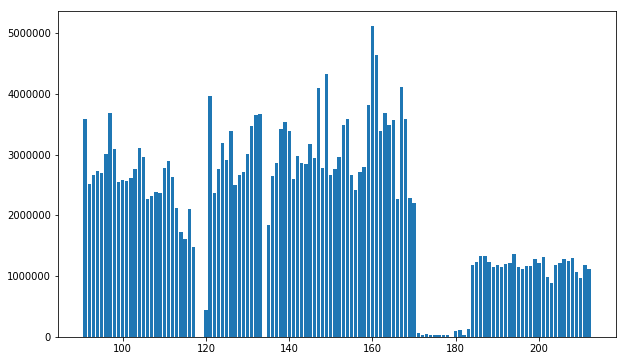

In [70]:
plt.figure(figsize=(10,6))
plt.bar(group.index, group['size'])
plt.show()

In [71]:
%%time
df = pd.read_csv('../input/Merged_Input.csv',usecols=['lat','lng'])

In [ ]:
col_dtypes = {
"Level":'int8',
"ClientMacAddr":'int64',
"lat":'float64',
"lng":'float64'
}
df2 = pd.read_csv('../input/reduced_data.csv',dtype=col_dtypes,usecols=['Level','ClientMacAddr','localtime'],
                 parse_dates=['localtime'],infer_datetime_format=True)

In [2]:
%%time
df = pd.read_csv('../input/origin_input.csv',dtype={
    "Level":'int8',
    "ClientMacAddr":'int64',
    "lat":'float64',
    "lng":'float64'
    },parse_dates=['localtime'],infer_datetime_format=True)

CPU times: user 4min 7s, sys: 39.9 s, total: 4min 47s
Wall time: 7min 1s


In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260068750 entries, 0 to 260068749
Data columns (total 5 columns):
ClientMacAddr    int64
Level            int8
localtime        datetime64[ns]
lat              float64
lng              float64
dtypes: datetime64[ns](1), float64(2), int64(1), int8(1)
memory usage: 8.0 GB


In [116]:
df.memory_usage(deep=True)

Index                    80
ClientMacAddr    2080550000
Level             260068750
localtime        2080550000
lat              2080550000
lng              2080550000
dtype: int64

In [5]:
group = df.groupby('ClientMacAddr').agg('size')

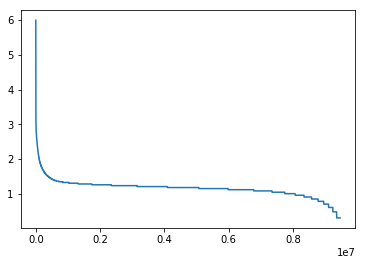

In [23]:
plt.plot(sorted(list(map(lambda x:np.log10(x), filter(lambda x:x>1, group))),reverse=True))
plt.show()

In [30]:
len(group)

9586251

In [32]:
len(list(filter(lambda x:x>27, sorted(group))))

464717

In [33]:
len(list(filter(lambda x:x>54, sorted(group))))

192211

In [34]:
group.mean()

27.1293491063399

In [35]:
group.std()

1251.627927798567

In [31]:
%%time
df = read_csv('test2.csv')

CPU times: user 19 s, sys: 376 ms, total: 19.4 s
Wall time: 18.2 s
